In [1]:
from datascience import *
import numpy as np
import glob
import pandas as pd
% matplotlib inline

Creating New CSV file. Only need to run bottom cell once.

In [ ]:
table_names = glob.glob('WRA/AAD_quartile_*.csv')
dfs = []
for table_name in table_names:
    dfs.append(pd.read_csv(table_name))
combined = pd.concat(dfs)
combined.to_csv('WRA/combined.csv', index = False)

Loading in combined table...

In [2]:
all_entries = Table.read_table('WRA/combined.csv')
# Data Cleaning: Dropping produced unnamed columns
all_entries = all_entries.drop(['Unnamed: 0'])
all_entries

/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


LAST NAME,FIRST NAME,MIDDLE INITIAL,RELOCATION PROJECT,ASSEMBLY CENTER,LAST PERMANENT ADDRESS,LAST PERMANENT ADDRESS STATE,LAST PERMANENT ADDRESS COUNTY,LAST PERMANENT ADDRESS POPULATION DENSITY,BIRTH PLACE OF PARENTS,FATHERS OCCUPATION IN U.S.,FATHERS OCCUPATION ABROAD,TOTAL YEARS OF SCHOOLING IN JAPAN,YEARS OF SCHOOLING IN JAPAN,EDUCATIONAL DEGREES,YEAR OF FIRST ARRIVAL IN TERRITORIAL U.S.,TOTAL LENGTH OF TIME IN JAPAN,NUMBER OF TIMES IN JAPAN,AGE AT TIME IN JAPAN,"MILITARY AND NAVAL SERVICE, PUBLIC ASSISTANCE AND PENSIONS, PHYSICAL DEFECTS",INDIVIDUAL NUMBER,SEX AND MARITAL STATUS,RACE OF INDIVIDUAL AND SPOUSE,YEAR OF BIRTH,BIRTH PLACE,"ALIEN REGISTRATION NUMBER, SOCIAL SECURITY NUMBER AND JAPANESE LANGUAGE SCHOOL",HIGHEST GRADE COMPLETED OR GRADE ATTENDING,LANGUAGE,RELIGION,PRIMARY OCCUPATION,SECONDARY OCCUPATION,TERTIARY OCCUPATION,POTENTIAL OCCUPATION 1,POTENTIAL OCCUPATION 2,FILE NUMBER,BLANK 1
NAKANISHI,SHIZUKO,nan,Tule Lake,Pinedale,"ENUMCLAW, KENT, AUBURN OR RENTON, WASHINGTON",Pacific States - Washington,KING,2500 - 4999,"Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE--ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,17100D,FEMALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,26,Pacific States - Washington,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS ATTENDED JAPANESE LANGUAGE SCHOOL,HIGH SCHOOL 2 IN U.S.,"JAPANESE SPEAK, WRITE, READ; ENGLISH SPEAK, READ & WRITE",MASKED VALUE,nan,nan,nan,"Clerks, General",Library Assistants and Attendants,413298,21101
NAKANISHI,TADASHI,nan,Tule Lake,Pinedale,"ENUMCLAW, KENT, AUBURN OR RENTON, WASHINGTON",Pacific States - Washington,KING,2500 - 4999,"Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE--ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,17100E,MALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,27,Pacific States - Washington,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS ATTENDED JAPANESE LANGUAGE SCHOOL,ELEMENTARY 8 IN U.S.,"JAPANESE SPEAKING; ENGLISH SPEAK, READ AND WRITE",MASKED VALUE,nan,nan,nan,nan,nan,413299,21081
NAKANISHI,TERUKO,nan,Tule Lake,Pinedale,"ENUMCLAW, KENT, AUBURN OR RENTON, WASHINGTON",Pacific States - Washington,KING,2500 - 4999,"Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE--ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,17100F,FEMALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,30,Pacific States - Washington,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS ATTENDED JAPANESE LANGUAGE SCHOOL,ELEMENTARY 6 IN U.S.,"JAPANESE SPEAK, WRITE, READ; ENGLISH SPEAK, READ & WRITE",MASKED VALUE,nan,nan,nan,nan,nan,413300,11061
NAKANISHI,TAKESHI,R,Tule Lake,Pinedale,"ENUMCLAW, KENT, AUBURN OR RENTON, WASHINGTON",Pacific States - Washington,KING,2500 - 4999,"Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE-- NOT ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,17100G,MALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,41,Pacific States - Washington,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,NO SCHOOLING OR KINDERGARTEN IN EITHER JAPAN OR U.S.,NOT APPLICABLE (11 YRS. AND UNDER),MASKED VALUE,nan,nan,nan,nan,nan,413301,13001
NAKANISHI,SHIZUE,nan,Tule Lake,Pinedale,"ENUMCLAW, KENT, AUBURN OR RENTON, WASHINGTON",Pacific States - Washington,KING,2500 - 4999,"Father=Japan, Mother=Japan","BLANK, UNKNOWN, NONE, DASH",FARM OPERATORS & MANAGERS,12 YEARS,1-8 & 9-12 YEARS OF SCHOOL ONLY,NO DEGREE,nan,15 YEARS BUT LESS THAN 20 IN JAPAN,1 TIME-- NOT ATTENDING SCHOOL,BETWEEN AGES 0-9 & ALSO 10-19,MASKED VALUE,17100H,FEMALE MARRIED,INDIVIDUAL-JAPANESE; SPOUSE-JAPANESE,19,Pacific States - California,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,HIGH SCHOOL 4 IN JAPAN,"JAPANESE SPEAK, WRITE, READ ONLY",MASKED VALUE,"Farm Hands, Vegetable",nan,nan,Semiskilled Occupations in Manufacture of Knit Goods,Semiskilled

In [3]:
student_names = ['Kazuya Abe', 'Emiko Hayashi', 'Dorothy Sakuri', 'Yoshi Sugiyama', 'Motomu Takata', 'Haru Tanaka', 'Fujino Yashida']
unknown_first_name = ['H Hitaya', 'T Watanabe']
student_names

['Kazuya Abe',
 'Emiko Hayashi',
 'Dorothy Sakuri',
 'Yoshi Sugiyama',
 'Motomu Takata',
 'Haru Tanaka',
 'Fujino Yashida']

Let's try searching for the last name first

In [ ]:
#all_entries.where('LAST NAME', last_name).where('FIRST NAME', first_name)
def get_student_info(student_names):
    student_table = Table(labels = all_entries.labels)
    for student in student_names:
        first_name, last_name = student.upper().split(' ')
        # Why did we use the upper function?
        print('First Name: {}, Last Name: {}'.format(first_name, last_name))
        if 
        query = all_entries.where('LAST NAME', last_name).where('FIRST NAME', first_name)
        student_table.append(query)
    return student_table
#student_table
get_student_info(student_names)

In [ ]:
project_counts = all_entries.group('RELOCATION PROJECT')
project_counts.barh('RELOCATION PROJECT')

In [7]:
tule_lake = all_entries.where("RELOCATION PROJECT", "Tule Lake")

In [13]:
# George Takei
all_entries.where('LAST NAME', 'TAKEI').where("FIRST NAME", "HOSATO")

LAST NAME,FIRST NAME,MIDDLE INITIAL,RELOCATION PROJECT,ASSEMBLY CENTER,LAST PERMANENT ADDRESS,LAST PERMANENT ADDRESS STATE,LAST PERMANENT ADDRESS COUNTY,LAST PERMANENT ADDRESS POPULATION DENSITY,BIRTH PLACE OF PARENTS,FATHERS OCCUPATION IN U.S.,FATHERS OCCUPATION ABROAD,TOTAL YEARS OF SCHOOLING IN JAPAN,YEARS OF SCHOOLING IN JAPAN,EDUCATIONAL DEGREES,YEAR OF FIRST ARRIVAL IN TERRITORIAL U.S.,TOTAL LENGTH OF TIME IN JAPAN,NUMBER OF TIMES IN JAPAN,AGE AT TIME IN JAPAN,"MILITARY AND NAVAL SERVICE, PUBLIC ASSISTANCE AND PENSIONS, PHYSICAL DEFECTS",INDIVIDUAL NUMBER,SEX AND MARITAL STATUS,RACE OF INDIVIDUAL AND SPOUSE,YEAR OF BIRTH,BIRTH PLACE,"ALIEN REGISTRATION NUMBER, SOCIAL SECURITY NUMBER AND JAPANESE LANGUAGE SCHOOL",HIGHEST GRADE COMPLETED OR GRADE ATTENDING,LANGUAGE,RELIGION,PRIMARY OCCUPATION,SECONDARY OCCUPATION,TERTIARY OCCUPATION,POTENTIAL OCCUPATION 1,POTENTIAL OCCUPATION 2,FILE NUMBER,BLANK 1
TAKEI,HOSATO,G,Rohwer,Santa Anita,"LOS ANGELES, CALIFORNIA",Pacific States - California,LOS ANGELES,"1,000,000 - or more","Father=Japan, Mother=U.S. exc.",SKILLED CRAFTSMEN & FOREMEN/SEMI-SKILLED OPERATORS (EXCE ...,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE--ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,12832C,MALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,37,Pacific States - California,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,NO SCHOOLING OR KINDERGARTEN IN EITHER JAPAN OR U.S.,NOT APPLICABLE (11 YRS. AND UNDER),MASKED VALUE,nan,nan,nan,nan,nan,902945,13001


In [20]:
tule_lake.group("POTENTIAL OCCUPATION 1").where("POTENTIAL OCCUPATION 1", are.containing("Author"))

POTENTIAL OCCUPATION 1,count
"Authors, Editors, and Reporters",64


In [22]:
potential_news_writers = tule_lake.where("POTENTIAL OCCUPATION 1", are.containing("Author"))

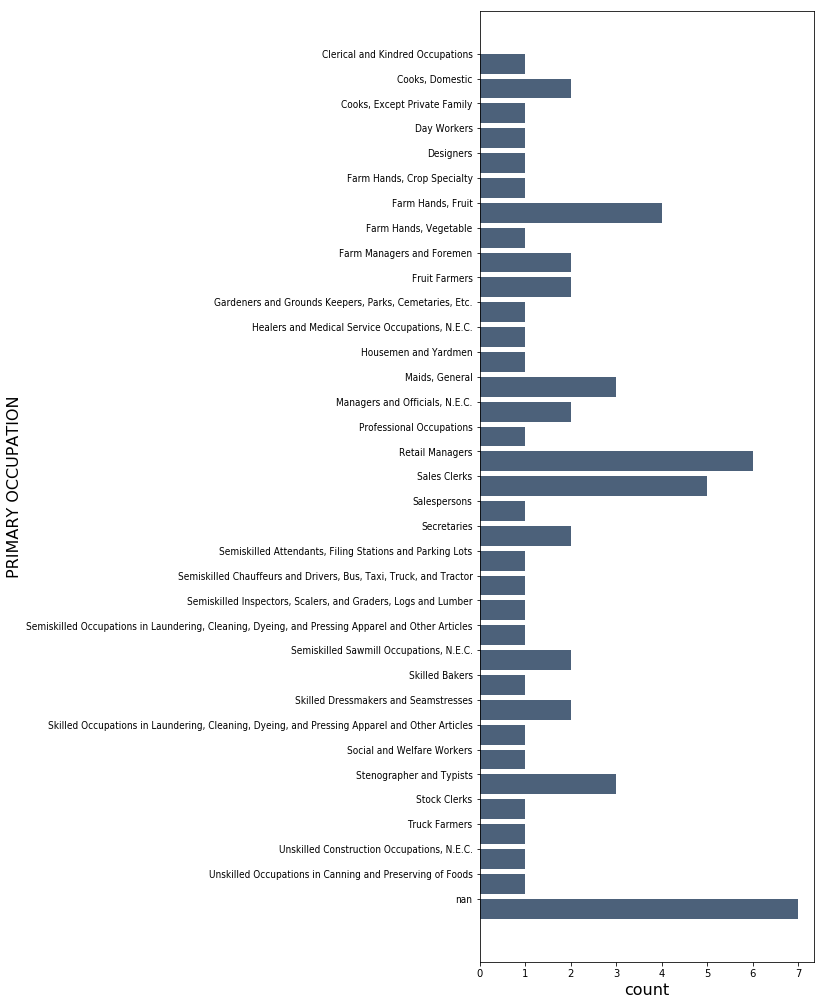

In [25]:
potential_news_writers.group("PRIMARY OCCUPATION").barh("PRIMARY OCCUPATION")

In [28]:
potential_news_writers

LAST NAME,FIRST NAME,MIDDLE INITIAL,RELOCATION PROJECT,ASSEMBLY CENTER,LAST PERMANENT ADDRESS,LAST PERMANENT ADDRESS STATE,LAST PERMANENT ADDRESS COUNTY,LAST PERMANENT ADDRESS POPULATION DENSITY,BIRTH PLACE OF PARENTS,FATHERS OCCUPATION IN U.S.,FATHERS OCCUPATION ABROAD,TOTAL YEARS OF SCHOOLING IN JAPAN,YEARS OF SCHOOLING IN JAPAN,EDUCATIONAL DEGREES,YEAR OF FIRST ARRIVAL IN TERRITORIAL U.S.,TOTAL LENGTH OF TIME IN JAPAN,NUMBER OF TIMES IN JAPAN,AGE AT TIME IN JAPAN,"MILITARY AND NAVAL SERVICE, PUBLIC ASSISTANCE AND PENSIONS, PHYSICAL DEFECTS",INDIVIDUAL NUMBER,SEX AND MARITAL STATUS,RACE OF INDIVIDUAL AND SPOUSE,YEAR OF BIRTH,BIRTH PLACE,"ALIEN REGISTRATION NUMBER, SOCIAL SECURITY NUMBER AND JAPANESE LANGUAGE SCHOOL",HIGHEST GRADE COMPLETED OR GRADE ATTENDING,LANGUAGE,RELIGION,PRIMARY OCCUPATION,SECONDARY OCCUPATION,TERTIARY OCCUPATION,POTENTIAL OCCUPATION 1,POTENTIAL OCCUPATION 2,FILE NUMBER,BLANK 1
OIYE,TOSHIFUA,nan,Tule Lake,Pinedale,"TACOMA, WASHINGTON",Pacific States - Washington,PIERCE,"25,000 - 999,999","Father=Japan, Mother=Japan",MANAGERIAL & OFFICIAL (EXCEPT FARM),FARM OPERATORS & MANAGERS,8 YEARS,1-8 YEARS OF SCHOOL ONLY,NO DEGREE,18,10 YEARS BUT LESS THAN 15 YEARS IN JAPAN,2 TIMES-- NOT ATTENDING SCHOOL,"BETWEEN AGES 0-9, 10-19 & ALSO 20 & OVER",MASKED VALUE,19433A,MALE MARRIED,INDIVIDUAL-JAPANESE; SPOUSE-JAPANESE,4,Japan - Shikoku Is.,HAS A.R. BUT NOT S.S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE SCHOOL,ELEMENTARY 8 IN JAPAN,"JAPANESE SPEAK, WRITE, READ; ENGLISH SPEAKING",MASKED VALUE,"Cooks, Except Private Family",nan,nan,"Authors, Editors, and Reporters",Musicians and Teachers of Music,413494,62084
HAYASHI,NOBORU,F,Tule Lake,Pinedale,"TACOMA, WASHINGTON",Pacific States - Washington,PIERCE,"25,000 - 999,999","Father=Japan, Mother=Japan","BLANK, UNKNOWN, NONE, DASH",MANAGERIAL & OFFICIAL (EXCEPT FARM),10 YEARS,1-8 & 9-12 YEARS OF SCHOOL ONLY,NO DEGREE,05,15 YEARS BUT LESS THAN 20 IN JAPAN,1 TIME-- NOT ATTENDING SCHOOL,BETWEEN AGES 0-9 & ALSO 10-19,MASKED VALUE,19418B,MALE MARRIED,INDIVIDUAL-JAPANESE; SPOUSE-JAPANESE,89,Japan - Southern Division,HAS A.R. BUT NOT S.S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE SCHOOL,HIGH SCHOOL 3 IN JAPAN,"JAPANESE SPEAK, WRITE, READ; ENGLISH SPEAK, READ & WRITE",MASKED VALUE,Retail Managers,"Barbers, Beauticians, and Manicurists","Salesmen and Sales Agents, Except to Consumers","Authors, Editors, and Reporters",nan,414981,72114
KOTO,KINJIRO,nan,Tule Lake,None,"MARYSVILLE, CALIFORNIA",Pacific States - California,YUBA,5000 - 9999,"Father=Japan, Mother=Japan","BLANK, UNKNOWN, NONE, DASH",FARM LABORERS INCLUDING FOREMEN,5 YEARS,1-8 YEARS OF SCHOOL ONLY,NO DEGREE,20,20 YEARS OR MORE,1 TIME-- NOT ATTENDING SCHOOL,"BETWEEN AGES 0-9, 10-19 & ALSO 20 & OVER",MASKED VALUE,38562A,MALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,90,"Japan - Urban Prefectures (Kyoto, Osaka and Tokyo)",HAS BOTH A.R. AND S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE SCHOOL,ELEMENTARY 5 IN JAPAN,"JAPANESE SPEAK, WRITE, READ; ENGLISH SPEAK, READ & WRITE",MASKED VALUE,"Cooks, Domestic","Farm Hands, Fruit",nan,"Authors, Editors, and Reporters","Athletes, Sports Instructors, and Sports Officials",414240,72054
SORAKUBO,TORAO,nan,Tule Lake,Pinedale,"BOTHELL, REDMOND, KIRKLAND, DUVALL, ISSAQUAH, NORTH BEND ...",Pacific States - Washington,KING,Incorporated cities of less than 2500 population All uni ...,"Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE-- NOT ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,19928A,MALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,20,Pacific States - Washington,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS ATTENDED JAPANESE LANGUAGE SCHOOL,HIGH SCHOOL 4 IN U.S.,"JAPANESE SPEAKING; ENGLISH SPEAK, READ AND WRITE",MASKED VALUE,Truck Farmers,Professional Occupations,nan,"Authors, Editors, and Reporters",nan,414174,31121
YONEOKA,FUTORU,nan,Tule Lake,None,"MARYSVILLE, CALIFORNIA",Pacific States - California,YUBA,5000 - 9999,"Father=Ja

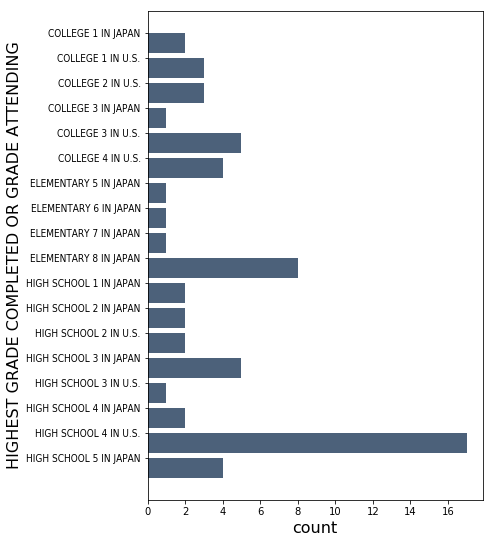

In [30]:
potential_news_writers.group("HIGHEST GRADE COMPLETED OR GRADE ATTENDING").barh("HIGHEST GRADE COMPLETED OR GRADE ATTENDING")

In [31]:
potential_news_writers.group("LANGUAGE")

LANGUAGE,count
"ENGLISH SPEAK, READ & WRITE; OTHER LANGUAGE READ OR READ ...",1
"ENGLISH SPEAK, WRITE, READ ONLY",2
"JAPANESE & ENGLISH SPEAK, READ & WRITE; OTHER LANGUAGE R ...",1
"JAPANESE & ENGLISH SPEAK, READ & WRITE; OTHER LANGUAGE S ...",1
"JAPANESE AND OTHER LANGUAGE SPEAKING; ENGLISH SPEAK, RE ...",1
"JAPANESE SPEAK, WRITE, READ ONLY",10
"JAPANESE SPEAK, WRITE, READ; ENGLISH SPEAK, READ & WRITE",19
"JAPANESE SPEAK, WRITE, READ; ENGLISH SPEAKING",5
"JAPANESE SPEAKING; ENGLISH SPEAK, READ & WRITE; OTHER LA ...",3
"JAPANESE SPEAKING; ENGLISH SPEAK, READ AND WRITE",18


In [35]:
tule_lake.where("POTENTIAL OCCUPATION 1", are.containing("Typist"))

LAST NAME,FIRST NAME,MIDDLE INITIAL,RELOCATION PROJECT,ASSEMBLY CENTER,LAST PERMANENT ADDRESS,LAST PERMANENT ADDRESS STATE,LAST PERMANENT ADDRESS COUNTY,LAST PERMANENT ADDRESS POPULATION DENSITY,BIRTH PLACE OF PARENTS,FATHERS OCCUPATION IN U.S.,FATHERS OCCUPATION ABROAD,TOTAL YEARS OF SCHOOLING IN JAPAN,YEARS OF SCHOOLING IN JAPAN,EDUCATIONAL DEGREES,YEAR OF FIRST ARRIVAL IN TERRITORIAL U.S.,TOTAL LENGTH OF TIME IN JAPAN,NUMBER OF TIMES IN JAPAN,AGE AT TIME IN JAPAN,"MILITARY AND NAVAL SERVICE, PUBLIC ASSISTANCE AND PENSIONS, PHYSICAL DEFECTS",INDIVIDUAL NUMBER,SEX AND MARITAL STATUS,RACE OF INDIVIDUAL AND SPOUSE,YEAR OF BIRTH,BIRTH PLACE,"ALIEN REGISTRATION NUMBER, SOCIAL SECURITY NUMBER AND JAPANESE LANGUAGE SCHOOL",HIGHEST GRADE COMPLETED OR GRADE ATTENDING,LANGUAGE,RELIGION,PRIMARY OCCUPATION,SECONDARY OCCUPATION,TERTIARY OCCUPATION,POTENTIAL OCCUPATION 1,POTENTIAL OCCUPATION 2,FILE NUMBER,BLANK 1
NARITA,MIYO,E,Tule Lake,Pinedale,"ENUMCLAW, KENT, AUBURN OR RENTON, WASHINGTON",Pacific States - Washington,KING,2500 - 4999,"Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE-- NOT ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,16941D,FEMALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,22,Pacific States - Washington,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS ATTENDED JAPANESE LANGUAGE SCHOOL,HIGH SCHOOL 4 IN U.S.,"JAPANESE SPEAKING; ENGLISH SPEAK, READ AND WRITE",MASKED VALUE,"Maids, General",Clerical and Kindred Occupations,Undefined Code,Stenographer and Typists,Skilled Dressmakers and Seamstresses,413721,31121
NOJI,CHIZUNA,nan,Tule Lake,Pinedale,"Undocumented City, OREGON",Pacific States - Oregon,HOOD RIVER,Incorporated cities of less than 2500 population All uni ...,"Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,FARM OPERATORS & MANAGERS,NONE,NONE,NO DEGREE,--,NONE,NONE-- NOT ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,16291D,FEMALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,23,Pacific States - Oregon,HAS S.S. BUT NOT A.R. NUMBER AND HAS ATTENDED JAPANESE LANGUAGE SCHOOL,HIGH SCHOOL 4 IN U.S.,"JAPANESE SPEAK, WRITE, READ; ENGLISH SPEAK, READ & WRITE",MASKED VALUE,Fruit and Vegetable Graders and Packers,Clerical and Kindred Occupations,nan,Stenographer and Typists,Semiskilled Dressmakers and Seamstresses,413430,21121
OGI,EMI,nan,Tule Lake,Merced,"SAN FRANCISCO, CALIFORNIA",Pacific States - California,SAN FRANCISCO,"25,000 - 999,999","Father=Japan, Mother=Japan",MANAGERIAL & OFFICIAL (EXCEPT FARM),"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,nan,--,NONE,NONE-- NOT ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,19244B,FEMALE MARRIED,INDIVIDUAL-JAPANESE; SPOUSE-JAPANESE,16,Pacific States - California,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS ATTENDED JAPANESE LANGUAGE SCHOOL,POST GRADUATE OR COLL. 5 OR MORE IN U.S.,"JAPANESE SPEAKING; ENGLISH SPEAK, READ AND WRITE",MASKED VALUE,Trained Nurses,nan,nan,Stenographer and Typists,Musicians and Teachers of Music,413059,41181
OHASHI,MARY,F,Tule Lake,Pinedale,"ENUMCLAW, KENT, AUBURN OR RENTON, WASHINGTON",Pacific States - Washington,KING,2500 - 4999,"Father=Japan, Mother=Japan",FARM LABORERS INCLUDING FOREMEN,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE-- NOT ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,17221C,FEMALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,20,Pacific States - Washington,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS ATTENDED JAPANESE LANGUAGE SCHOOL,COLLEGE 1 IN U.S.,"JAPANESE SPEAKING; ENGLISH SPEAK, READ AND WRITE",MASKED VALUE,"Maids, General","Farm Hands, Vegetable",nan,Stenographer and Typists,Musicians and Teachers of Music,413982,31141
OKADA,HISASHI,B,Tule Lake,Pinedale,"TACOMA, WASHINGTON",Pacific States - Washington,PIERCE,"25,000 - 999,999","Father=Japan, Mother=Japan",UNSKILLED LABORERS (EXCEPT FARM),MANAGERIAL & OFFICIAL (EXCEPT FARM),NONE,NONE,NO DEGREE,--,NONE,NONE-- NOT ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,19492B,MALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,19,Pacific States - Washington,

In [34]:
potential_news_writers.where("PRIMARY OCCUPATION", are.containing("Author"))

LAST NAME,FIRST NAME,MIDDLE INITIAL,RELOCATION PROJECT,ASSEMBLY CENTER,LAST PERMANENT ADDRESS,LAST PERMANENT ADDRESS STATE,LAST PERMANENT ADDRESS COUNTY,LAST PERMANENT ADDRESS POPULATION DENSITY,BIRTH PLACE OF PARENTS,FATHERS OCCUPATION IN U.S.,FATHERS OCCUPATION ABROAD,TOTAL YEARS OF SCHOOLING IN JAPAN,YEARS OF SCHOOLING IN JAPAN,EDUCATIONAL DEGREES,YEAR OF FIRST ARRIVAL IN TERRITORIAL U.S.,TOTAL LENGTH OF TIME IN JAPAN,NUMBER OF TIMES IN JAPAN,AGE AT TIME IN JAPAN,"MILITARY AND NAVAL SERVICE, PUBLIC ASSISTANCE AND PENSIONS, PHYSICAL DEFECTS",INDIVIDUAL NUMBER,SEX AND MARITAL STATUS,RACE OF INDIVIDUAL AND SPOUSE,YEAR OF BIRTH,BIRTH PLACE,"ALIEN REGISTRATION NUMBER, SOCIAL SECURITY NUMBER AND JAPANESE LANGUAGE SCHOOL",HIGHEST GRADE COMPLETED OR GRADE ATTENDING,LANGUAGE,RELIGION,PRIMARY OCCUPATION,SECONDARY OCCUPATION,TERTIARY OCCUPATION,POTENTIAL OCCUPATION 1,POTENTIAL OCCUPATION 2,FILE NUMBER,BLANK 1
